In [7]:
import io
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('NetflixOriginals.csv', encoding='latin-1')

## Exploratory Data Analysis & Preprocessing The Data

In [9]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe().T)


check_df(df)

##################### Shape #####################
(584, 6)
##################### Types #####################
Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object
##################### Head #####################
             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi  
##################### Tail #####################
    

In [10]:
# Convert objects to categorical variables
object_columns = df.select_dtypes("object").columns

print(object_columns)

Index(['Title', 'Genre', 'Premiere', 'Language'], dtype='object')


In [11]:
for colname in object_columns:
    df[colname] = df[colname].astype('category')  

# Check it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Title       584 non-null    category
 1   Genre       584 non-null    category
 2   Premiere    584 non-null    category
 3   Runtime     584 non-null    int64   
 4   IMDB Score  584 non-null    float64 
 5   Language    584 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 50.9 KB


# Veri setinde outlier veri var mıdır?

Outliers Detection with z score for numeric columns

In [12]:
numerical_columns = df.select_dtypes(["float64", "int64"]).columns  # finds the integer and float columns in the dataset
numerical_columns

Index(['Runtime', 'IMDB Score'], dtype='object')

In [13]:
for column in numerical_columns:  # iterate columns one by one
 
  max_value = (3*df[column].std()) + df[column].mean()  # finds the max value that is not going to be called not an outlier
  min_value = -((3*df[column].std()) + df[column].mean())  # finds the min value that is not going to be called not an outlier

  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()  # calculate the new mean of the column without the outlier values
  # if there is no outlier value then the mean will be np.nan in this situation don't need to do imputation
  if mean is not np.nan:  
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean  # change outlier values with mean
    df[column].fillna(mean, inplace=True)  # also fill nan values with mean
  else:  # this condition means there is no outlier value in the column
    df[column].fillna(df[column].mean(), inplace=True)  # just fill nan values with mean


Imputation method for categorical variables (we cannot use z score for string values)

In [14]:
categorical_columns = df.select_dtypes("category")
categorical_columns

,Title,Genre,Premiere,Language
0,Enter the Anime,Documentary,"August 5, 2019",English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",Spanish
2,The App,Science fiction/Drama,"December 26, 2019",Italian
3,The Open House,Horror thriller,"January 19, 2018",English
4,Kaali Khuhi,Mystery,"October 30, 2020",Hindi
...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",Portuguese


In [ ]:
 # Put the most repeated value
for column in categorical_columns:
  df[column] = df[column].fillna(df[column].mode().iloc[0])

# Data Visualization

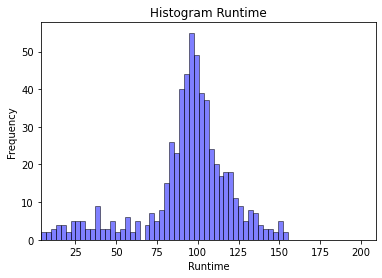

In [15]:
# Build Histogram to visualise Runtime distribution
num_bins = 50
n, bins, patches = plt.hist(df["Runtime"], num_bins, color='b', alpha=0.5, histtype = 'bar', ec = 'black')
plt.ylabel ('Frequency')
plt.xlabel ('Runtime')
plt.xlim([4, 209])  
  
plt.title ('Histogram Runtime')
plt.show()

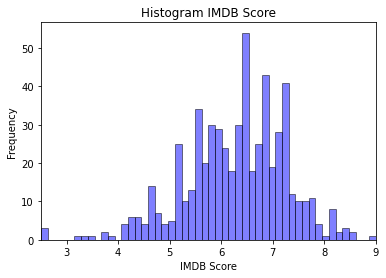

In [16]:
# Build Histogram to visualise Runtime distribution
num_bins = 50
n, bins, patches = plt.hist(df["IMDB Score"], num_bins, color='b', alpha=0.5, histtype = 'bar', ec = 'black')
plt.ylabel ('Frequency')
plt.xlabel ('IMDB Score')
plt.xlim([2.5, 9])  
  
plt.title ('Histogram IMDB Score')
plt.show()

Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

<AxesSubplot:>

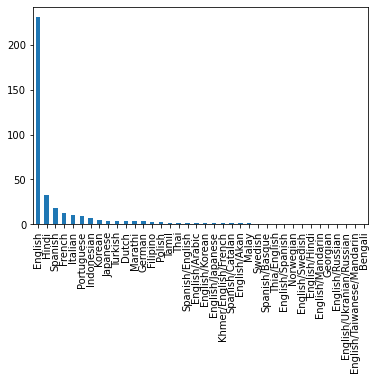

In [29]:
mean_runtime = df["Runtime"].mean()
language_longest = df.loc[(df["Runtime"] > mean_runtime)]["Language"]
language_longest.value_counts().plot(kind="bar")

2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [30]:
df['Premiere'] = pd.to_datetime(df['Premiere']) 
df['Premiere']

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Premiere, Length: 584, dtype: datetime64[ns]

In [31]:
df_specified = df.loc[(df["Premiere"] > "2019-01-01") & (df["Premiere"] < "2020-07-01")]

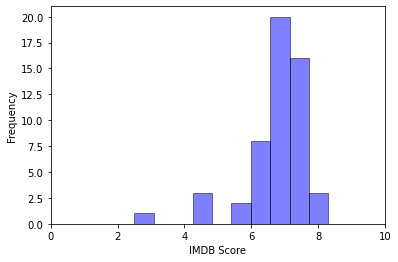

In [32]:
x = df_specified.loc[df["Genre"].str.contains("Documentary")]["IMDB Score"]
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, color='b', alpha=0.5, histtype = 'bar', ec = 'black')
plt.ylabel ('Frequency')
plt.xlabel ('IMDB Score')
plt.xlim([0, 10])  

plt.show()

İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [33]:
max_imdb_i = df["IMDB Score"].idxmax()
max_imdb_i

583

In [35]:
max_eng_genre = df.loc[df["Language"].str.contains("English")]["Genre"][max_imdb_i]
print("The genre which has the highest IMDB score in English language is", max_eng_genre)

The genre which has the highest IMDB score in English language is Documentary


'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [36]:
avg_hindi = df.loc[df["Language"].str.contains("Hindi")]["Runtime"].mean()
print("The average runtime in Hindi language is", round(avg_hindi,2))

The average runtime in Hindi language is 111.03


'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [37]:
print("Genre category number is " + str(df["Genre"].nunique()) +  " and the categories are as follows : \n", df["Genre"].value_counts())

Genre category number is 115 and the categories are as follows : 
 Documentary                   159
Drama                          77
Comedy                         49
Romantic comedy                39
Thriller                       33
                             ... 
Coming-of-age comedy-drama      1
Comedy/Horror                   1
Comedy/Fantasy/Family           1
Comedy mystery                  1
Zombie/Heist                    1
Name: Genre, Length: 115, dtype: int64


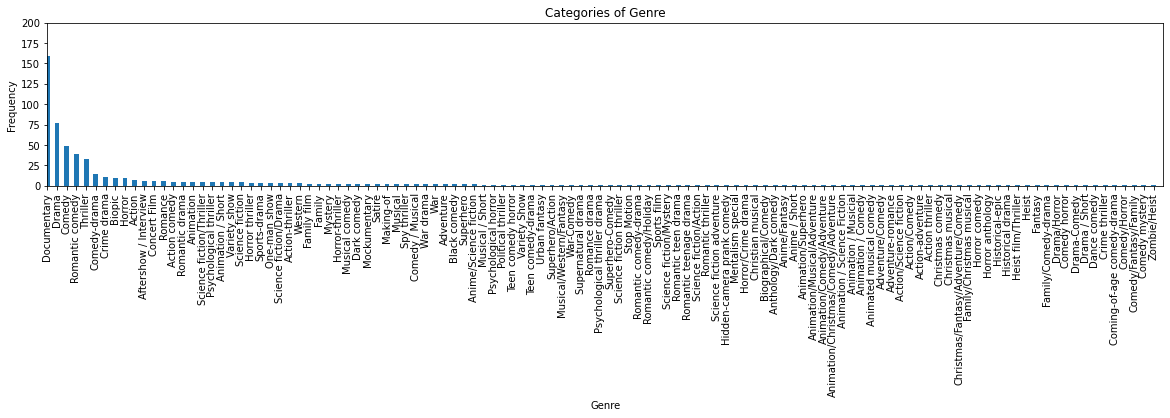

In [38]:
plt.figure(figsize=(20,3))
df["Genre"].value_counts().plot(kind="bar")
plt.title("Categories of Genre")
plt.ylabel ('Frequency')
plt.xlabel ('Genre')
plt.xlim([0,115])  
plt.ylim([0,200])  

plt.show()

Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [39]:
df["Language"].value_counts().head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [40]:
print("The first ten films with the highest IMDB score are as follows : ")
df.sort_values(by='IMDB Score', ascending=False)[["Title", "IMDB Score"]].head(10)

The first ten films with the highest IMDB score are as follows : 


,Title,IMDB Score
583,David Attenborough: A Life on Our Planet,9.0
582,Emicida: AmarElo - It's All For Yesterday,8.6
581,Springsteen on Broadway,8.5
580,Winter on Fire: Ukraine's Fight for Freedom,8.4
579,Taylor Swift: Reputation Stadium Tour,8.4
578,Ben Platt: Live from Radio City Music Hall,8.4
577,Dancing with the Birds,8.3
576,Cuba and the Cameraman,8.3
573,Klaus,8.2
571,13th,8.2


IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

Text(0.5, 1.0, 'Correlation')

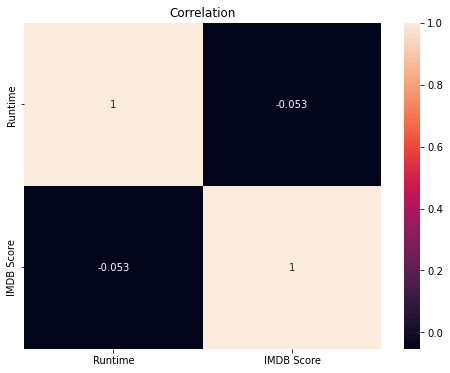

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot= True)
plt.title('Correlation')

IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [55]:
series = pd.Series(pd.unique(df.sort_values(by='IMDB Score', ascending=False)["Genre"])).head(10)
series


0                             Documentary
1                            One-man show
2                            Concert Film
3    Animation/Christmas/Comedy/Adventure
4                                   Drama
5                             Crime drama
6                       Animation / Short
7                         Musical / Short
8                               War drama
9                               Making-of
dtype: category
Categories (115, object): ['Action', 'Action comedy', 'Action thriller', 'Action-adventure', ..., 'War drama', 'War-Comedy', 'Western', 'Zombie/Heist']

'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [57]:
df.sort_values(by='Runtime', ascending=False)[["Title", "Runtime"]].head(10)

,Title,Runtime
328,Da 5 Bloods,155.0
581,Springsteen on Broadway,153.0
247,Citation,151.0
284,The Forest of Love,151.0
7,The Last Days of American Crime,149.0
543,Ludo,149.0
509,Raat Akeli Hai,149.0
194,Army of the Dead,148.0
5,Drive,147.0
16,Ghost Stories,144.0


Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz

The highest number of film in a year is  183


<AxesSubplot:ylabel='0'>

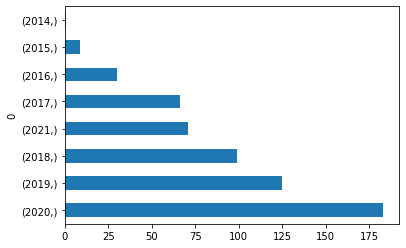

In [58]:
liste = [str(i)[0:4] for i in df["Premiere"]]
df_year = pd.DataFrame(liste)
print("The highest number of film in a year is ", df_year.value_counts()[0])
df_year.value_counts().plot(kind='barh')

In [59]:
df["df_year"] = df_year
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,df_year
0,Enter the Anime,Documentary,2019-08-05,58.0,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81.0,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79.0,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94.0,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90.0,3.4,Hindi,2020
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125.0,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91.0,8.4,English/Ukranian/Russian,2015
581,Springsteen on Broadway,One-man show,2018-12-16,153.0,8.5,English,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89.0,8.6,Portuguese,2020


Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [64]:

min_score = df["IMDB Score"].min()
df.loc[df["IMDB Score"] == min_score, ["IMDB Score", "Title"]]

,IMDB Score,Title
0,2.5,Enter the Anime


Hangi yılın toplam "runtime" süresi en fazladır?

In [81]:
df.groupby("df_year").agg({"Runtime" : ["sum"]})

,Runtime
,sum
df_year,
2014,81.000000
2015,814.000000
2016,2766.000000
2017,6129.000000
2018,9405.000000
2019,10740.379074
2020,17384.000000
2021,7214.000000


Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [82]:
df.groupby("Genre").agg({"Language" : ["count"]})

,Language
,count
Genre,
Action,7
Action comedy,5
Action thriller,1
Action-adventure,1
Action-thriller,3
...,...
War,2
War drama,2
